   DISTRICT  Attendance Rate
0        A1        95.226667
1       A15        89.053333
2        A7        93.488000
3        B2        88.948889
4        B3        90.846667
5       C11        91.395556
6        C6        86.318000
7       D14        90.208889
8        D4        86.956667
9       E13        85.227273
10      E18        91.656667
11       E5        93.595000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


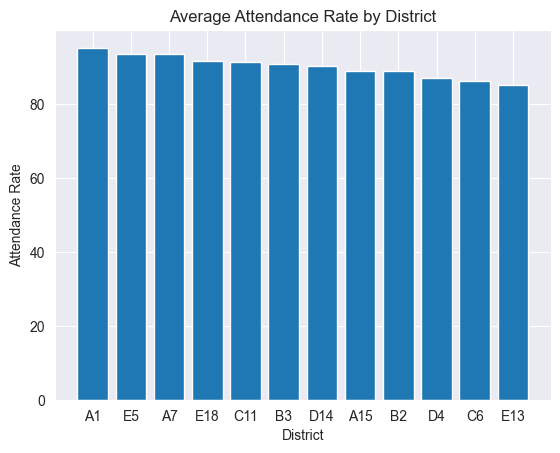

In [43]:
import pandas as pd
from geopy.distance import great_circle
import geopandas as gpd
from shapely.geometry import Point

# Load the shapefiles
city_council = gpd.read_file('City_Council_Districts_-_Effective_for_the_2023_Municipal_Election/City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.shp')
police_districts = gpd.read_file('Police_Districts/Police_Districts.shp')

# Read the school data
schools = pd.read_csv('school.csv')

# Convert the school data to a GeoDataFrame
geometry = [Point(xy) for xy in zip(schools.lon, schools.lat)]
schools = gpd.GeoDataFrame(schools, crs="EPSG:4326", geometry=geometry)

# Perform a spatial join between schools and police_districts
schools_with_districts = gpd.sjoin(schools, police_districts, op='within')

# Read the attendance data
attendance_files = [
    'attendance17-18.csv',
    'attendance18-19.csv',
    'attendance19-20.csv',
    'attendance20-21.csv',
    'attendance21-22.csv'
]

attendance_dfs = [pd.read_csv(file) for file in attendance_files]
attendance = pd.concat(attendance_dfs)

# Rename 'School Code' to 'Org Code' in attendance
attendance.rename(columns={'School Code': 'Org Code'}, inplace=True)

# Remove leading zeros from Org Code in both DataFrames
schools_with_districts['Org Code'] = schools_with_districts['Org Code'].astype(str).str.zfill(6)
attendance['Org Code'] = attendance['Org Code'].astype(str).str.zfill(6)

# Merge the school and attendance data
school_attendance = pd.merge(schools_with_districts, attendance, on='Org Code')

# Group the data by district and calculate the average attendance rate
district_attendance = school_attendance.groupby('DISTRICT')['Attendance Rate'].mean().reset_index()

# Save the results to a CSV file
district_attendance.to_csv('district_attendance.csv', index=False)

# Print the results
print(district_attendance)

import matplotlib.pyplot as plt

# Group the data by district and calculate the average attendance rate
district_attendance = school_attendance.groupby('DISTRICT')['Attendance Rate'].mean().reset_index()
district_attendance = district_attendance.sort_values(by='Attendance Rate', ascending=False) # sort by Attendance Rate in descending order

# Create a bar chart of attendance rate by district
plt.bar(district_attendance['DISTRICT'], district_attendance['Attendance Rate'])
plt.xlabel('District')
plt.ylabel('Attendance Rate')
plt.title('Average Attendance Rate by District')
plt.show()



This plot shows the average attendance rate by district in Boston. It indicates the districts where students have a higher rate of attendance. The district with the highest average attendance rate can be identified as the district with the tallest bar on the plot which are A1 E5 A7

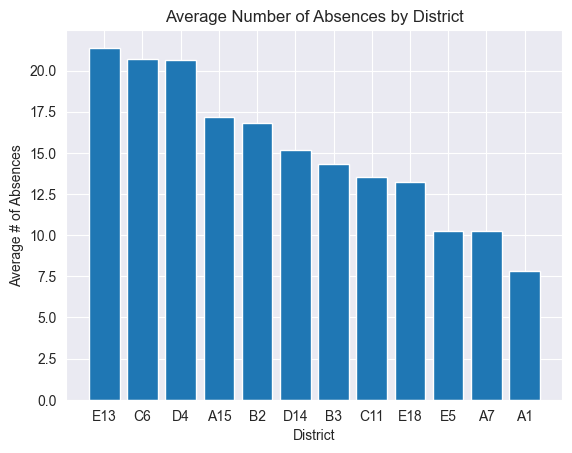

In [47]:
# Group the data by district and calculate the average number of absences
district_absences = school_attendance.groupby('DISTRICT')['Average # of Absences'].mean().reset_index()

# Sort the data by average number of absences
district_absences = district_absences.sort_values('Average # of Absences', ascending=False)

# Create a bar chart of average number of absences by district
plt.bar(district_absences['DISTRICT'], district_absences['Average # of Absences'])
plt.xlabel('District')
plt.ylabel('Average # of Absences')
plt.title('Average Number of Absences by District')
plt.show()



This plot shows the average number of absences by district in Boston. It indicates the districts where students have a higher rate of absence. The district with the highest average number of absences can be identified as the district with the tallest bar on the plot which is E13 C6 D4.

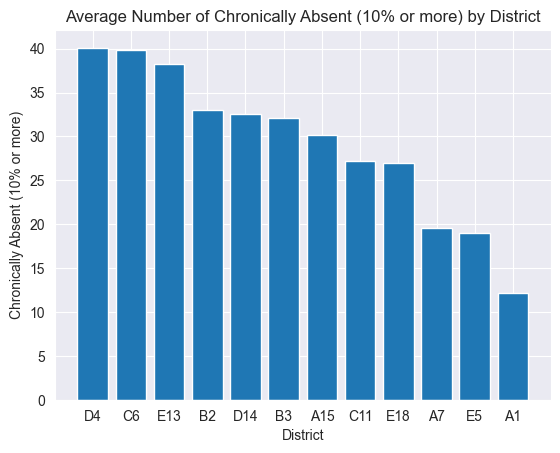

In [51]:
# Group the data by district and calculate the average number of absences
district_absences = school_attendance.groupby('DISTRICT')['Chronically Absent (10% or more)'].mean().reset_index()

# Sort the data by average number of absences
district_absences = district_absences.sort_values('Chronically Absent (10% or more)', ascending=False)

# Create a bar chart of average number of absences by district
plt.bar(district_absences['DISTRICT'], district_absences['Chronically Absent (10% or more)'])
plt.xlabel('District')
plt.ylabel('Chronically Absent (10% or more)')
plt.title('Average Number of Chronically Absent (10% or more) by District')
plt.show()

This plot shows the average number of chronically absent students (students who have missed 10% or more of school days) by district in Boston. The plot indicates the districts where students have a higher rate of chronic absenteeism. The district with the highest average number of chronically absent students can be identified as the district with the tallest bar on the plot which is D4 C6 E13.